In [1]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import datasets
import scipy.cluster.hierarchy as sch
import pandas as pd
from artificial_data import generate_datasets

In [2]:
noisy_circles, noisy_moons, blobs, aniso, varied = generate_datasets(n_samples=300)

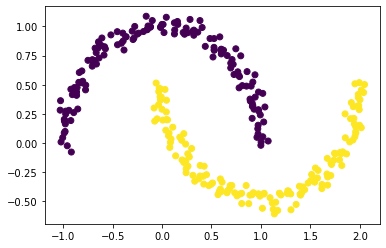

In [3]:
plt.scatter(noisy_moons['a'], noisy_moons['b'], c=noisy_moons['target'])

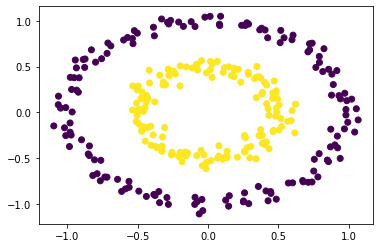

In [4]:
plt.scatter(noisy_circles['a'], noisy_circles['b'], c=noisy_circles['target'])

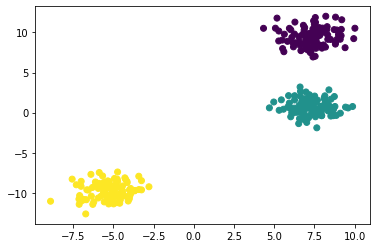

In [5]:
plt.scatter(blobs['a'], blobs['b'], c=blobs['target'])

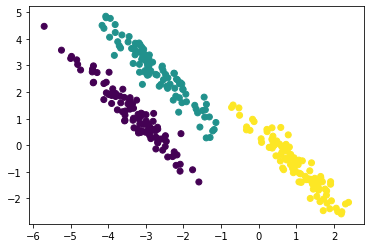

In [6]:
plt.scatter(aniso['a'], aniso['b'], c=aniso['target'])

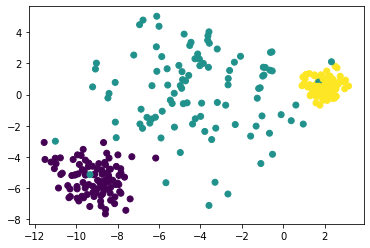

In [7]:
plt.scatter(varied['a'], varied['b'], c=varied['target'])

In [8]:
def sim(a, b):
    return 1/(1+distance.euclidean(a, b))

In [9]:
def calculate_cost(z, clusters):
    totalcost = 0
    for i in range(len(z)):
        cl1 = clusters[int(z[i, 0])]
        cl2 = clusters[int(z[i, 1])]
        assert(len(cl1)+len(cl2) == z[i,3])
        for c1 in cl1:
            for c2 in cl2:
                totalcost += sim(c1, c2)*z[i, 3]

        clusters.append(cl1+cl2)
    return totalcost

In [10]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)

In [11]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data)

In [12]:
z = sch.linkage(wine.data, method="weighted")
calculate_cost(z, [[point] for point in wine.data])

7729.389344650958

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glass_data = pd.read_csv(url, names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","target"], header=None)
glass_data = glass_data.drop(columns=["Id", "target"])

In [14]:
z = sch.linkage(glass_data, method="weighted")
calculate_cost(z, [[point] for point in glass_data.to_numpy()])

899026.4539128044

In [15]:
breast_cancer = datasets.load_breast_cancer()

In [16]:
z = sch.linkage(breast_cancer.data, method="centroid")
calculate_cost(z, [[point] for point in breast_cancer.data])

152756.26959732312

In [17]:
nc = noisy_circles.drop(columns='target')
z = sch.linkage(nc, method="ward")
calculate_cost(z, [[x] for x in nc.to_numpy()])

4364195.985864794

In [18]:
nm = noisy_moons.drop(columns='target')
z = sch.linkage(nm, method="ward")
calculate_cost(z, [[x] for x in nm.to_numpy()])

3889759.9955771463

In [19]:
blb = blobs.drop(columns='target')
z = sch.linkage(blb, method="weighted")
calculate_cost(z, [[x] for x in blb.to_numpy()])

858816.1315036177

In [20]:
vr = varied.drop(columns='target')
z = sch.linkage(vr, method="weighted")
calculate_cost(z, [[x] for x in vr.to_numpy()])

1235373.6985015937

In [21]:
ans = aniso.drop(columns='target')
z = sch.linkage(ans, method="weighted")
calculate_cost(z, [[x] for x in ans.to_numpy()])

2151353.164451026